## **Import libararies**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


## **Importing the datasets**

In [5]:
df = pd.read_csv('50_Startups.csv')
X = df.iloc[:, :-1].values
Y = df.iloc[:, 4].values


In [6]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [7]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [8]:
correlation_matrix = df.drop('State', axis=1).corr()

In [9]:
correlation_matrix


,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


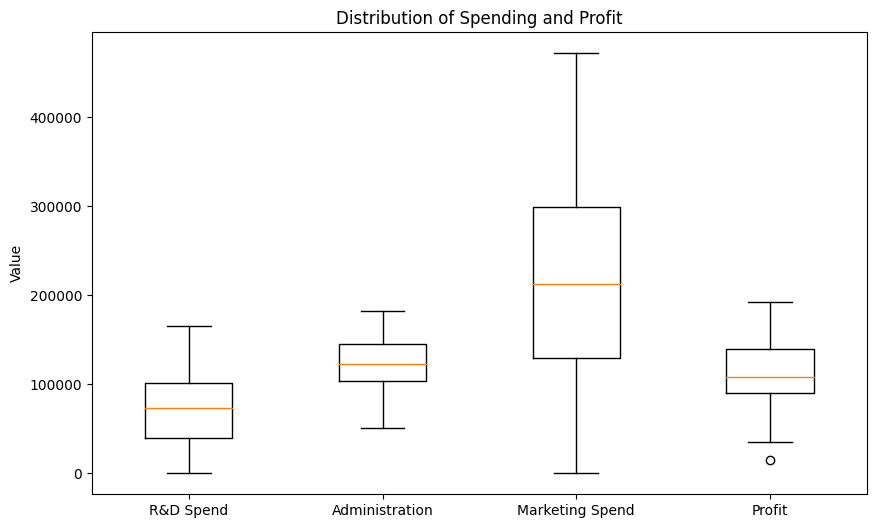

In [10]:
# @title Distribution of Spending and Profit

import matplotlib.pyplot as plt

# Assuming your data is in a pandas DataFrame called 'df'
plt.figure(figsize=(10, 6))
plt.boxplot([df['R&D Spend'], df['Administration'], df['Marketing Spend'], df['Profit']], labels=['R&D Spend', 'Administration', 'Marketing Spend', 'Profit'])
plt.title('Distribution of Spending and Profit')
_ = plt.ylabel('Value')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [12]:
df.isnull().sum()

,0
R&D Spend,0
Administration,0
Marketing Spend,0
State,0
Profit,0


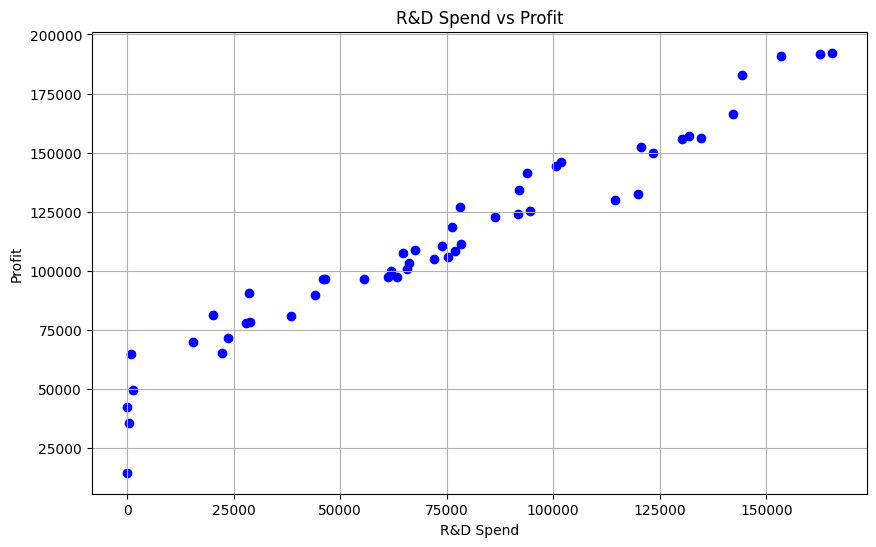

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(df['R&D Spend'], df['Profit'], color='blue')
plt.title('R&D Spend vs Profit')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.grid(True)
plt.show()


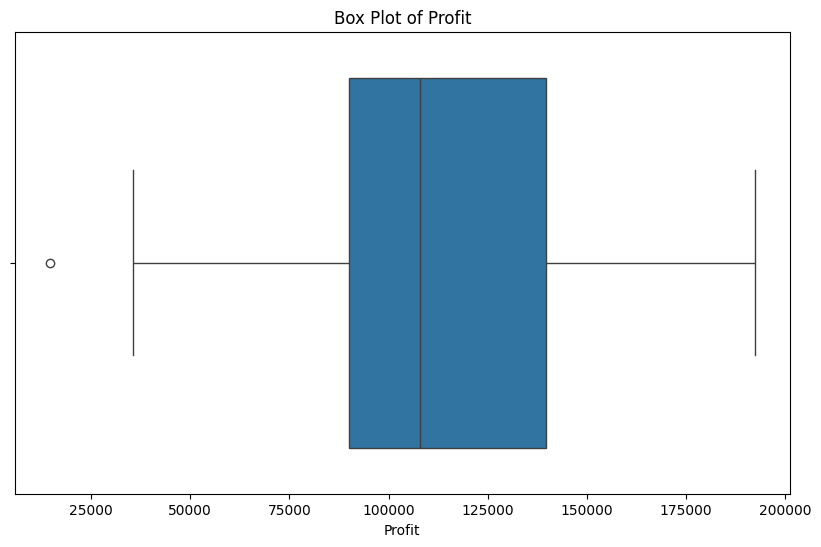

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Profit'])
plt.title('Box Plot of Profit')
plt.show()

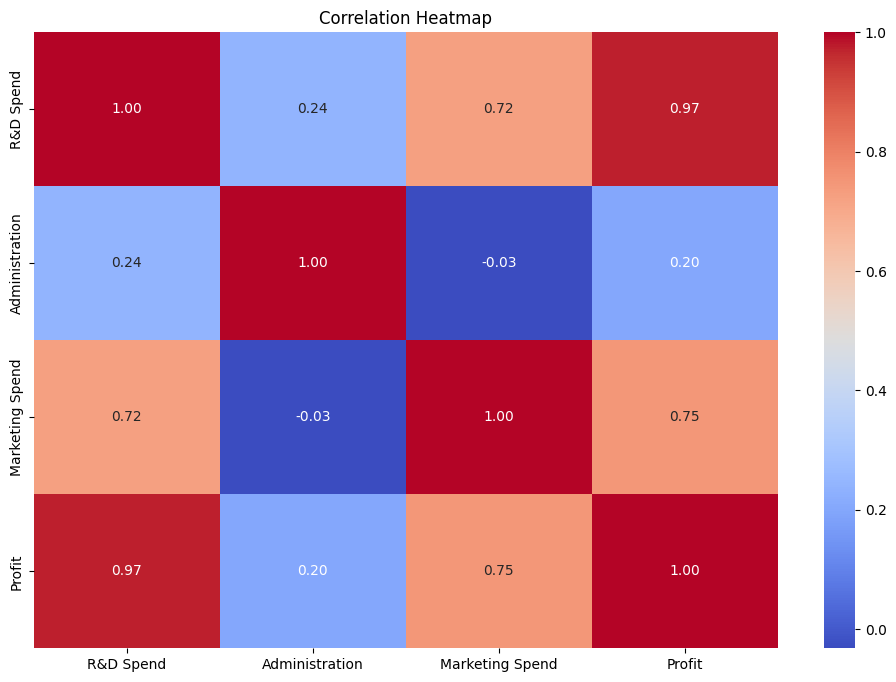

In [15]:
# Assuming 'State' is the column with string values
numeric_df = df.select_dtypes(include=np.number)

plt.figure(figsize=(12, 8))
correlation = numeric_df.corr()  # Calculate correlation only on numeric columns
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

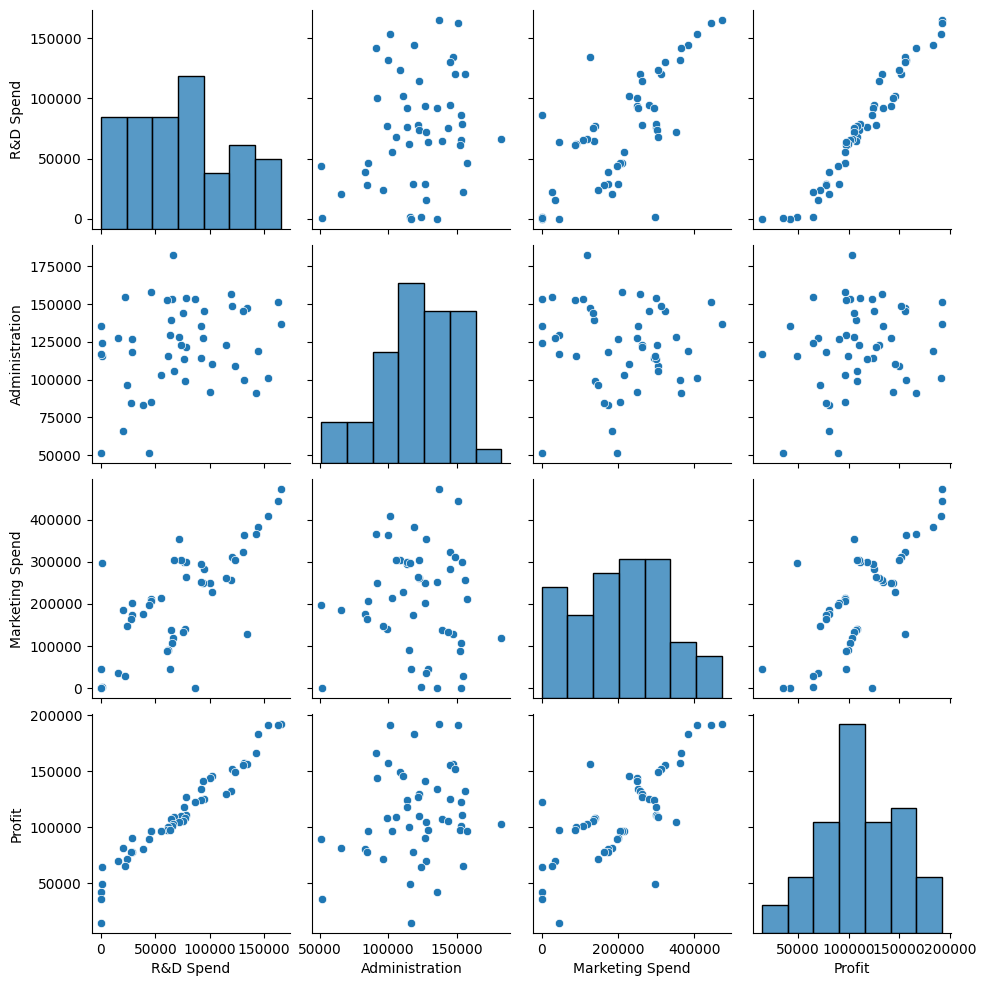

In [16]:
sns.pairplot(df)
plt.show()


# **Line Plot**

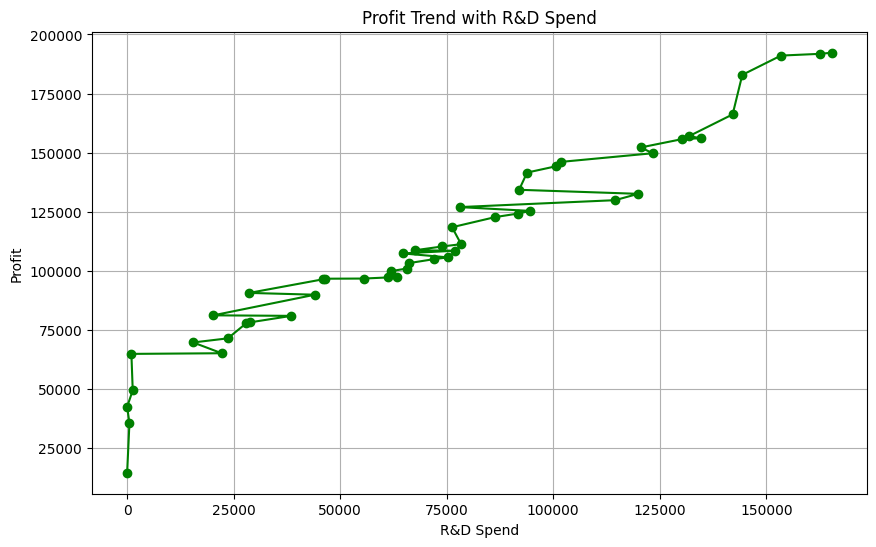

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(df['R&D Spend'], df['Profit'], marker='o', linestyle='-', color='green')
plt.title('Profit Trend with R&D Spend')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.grid(True)
plt.show()



# **Histogram**

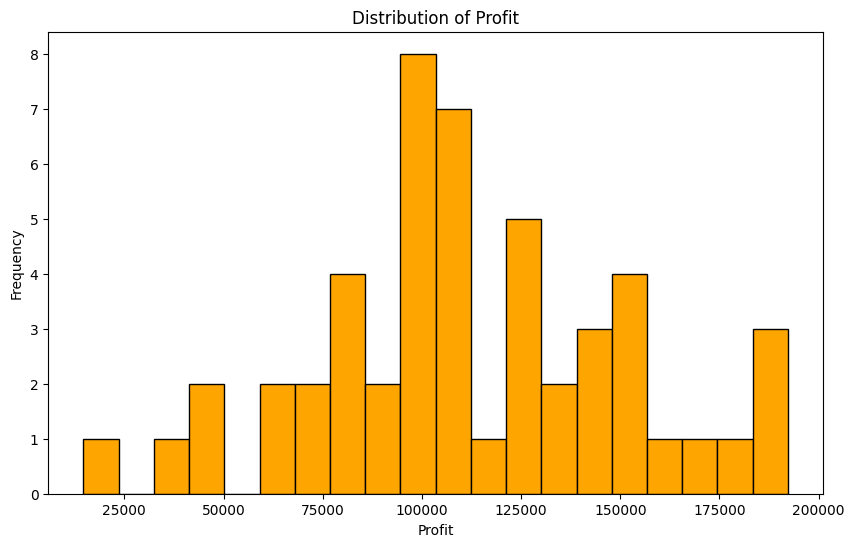

In [18]:
plt.figure(figsize=(10, 6))
plt.hist(df['Profit'], bins=20, color='orange', edgecolor='black')
plt.title('Distribution of Profit')
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.show()


# **Violin Plot**

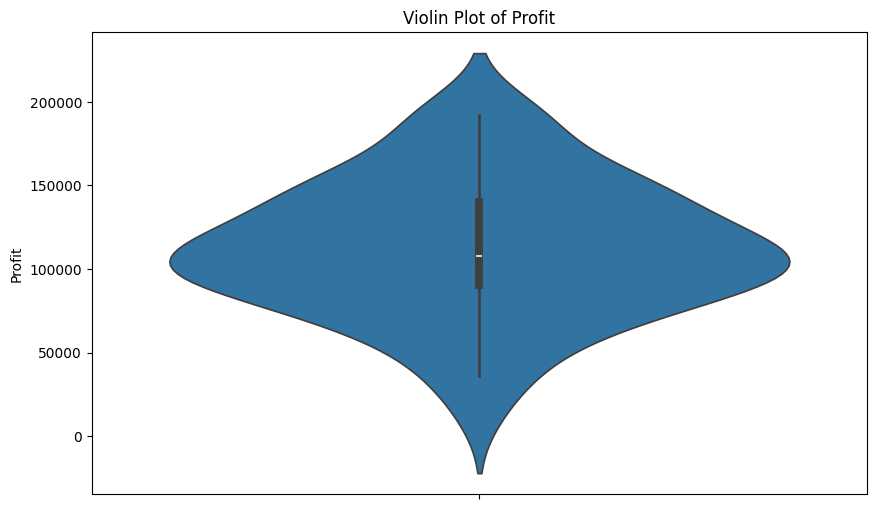

In [19]:
plt.figure(figsize=(10, 6))
sns.violinplot(y=df['Profit'])
plt.title('Violin Plot of Profit')
plt.show()


# **Facet Grid**

In [20]:
df['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

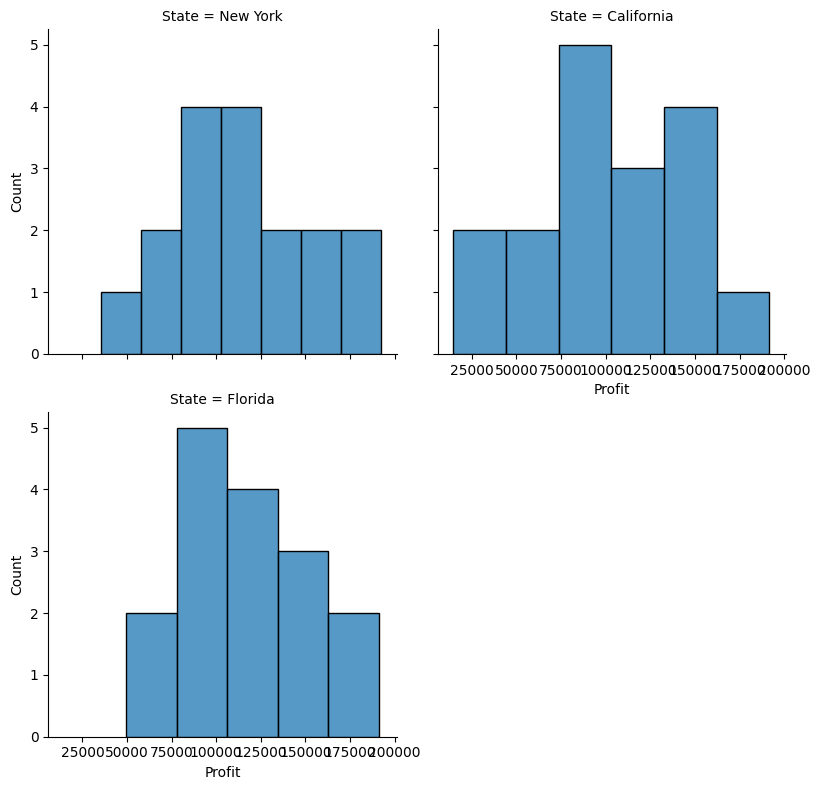

In [21]:
g = sns.FacetGrid(df, col='State', col_wrap=2, height=4)
g.map(sns.histplot, 'Profit')
g.add_legend()
plt.show()


# **Swarm Plot**

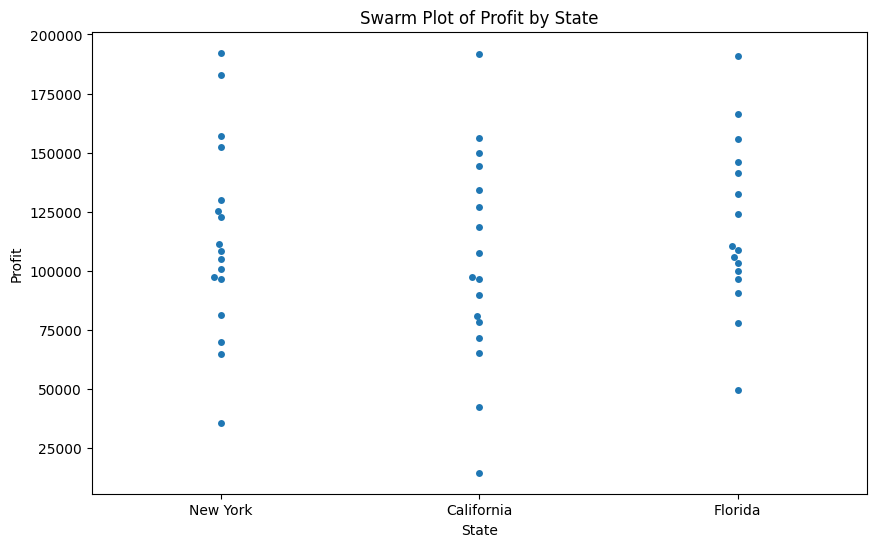

In [22]:
# Plotting
plt.figure(figsize=(10, 6))
sns.swarmplot(x='State', y='Profit', data=df)
plt.title('Swarm Plot of Profit by State')
plt.show()


# **3D Scatter Plot**

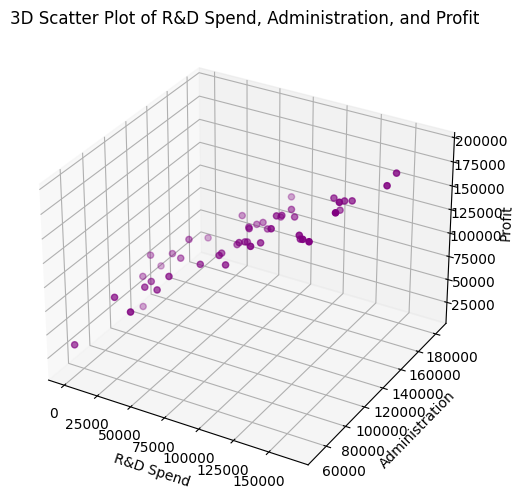

In [23]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['R&D Spend'], df['Administration'], df['Profit'], color='purple')
ax.set_xlabel('R&D Spend')
ax.set_ylabel('Administration')
ax.set_zlabel('Profit')
plt.title('3D Scatter Plot of R&D Spend, Administration, and Profit')
plt.show()


In [24]:
X = df.iloc[:, :-1].values
Y = df.iloc[:, 4].values

# **Encoding categorical data**

In [25]:
# Encoding the Independent Variable

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
X[:, 3] = labelencoder_X.fit_transform(X[:, 3])
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [26]:
# Assuming X is your data
# Create a ColumnTransformer to apply OneHotEncoder to the specified column
ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), [3])],  # Specify the column index to encode
    remainder='passthrough'  # Keep other columns unchanged
)

# Fit and transform the data
X = ct.fit_transform(X)
# X = onehotencoder.fit_transform(X).toarray() # This line is redundant as ct.fit_transform already handles the OneHotEncoding
# Ensure X is a NumPy array with numerical dtype
X = X.astype(float) # Convert X to numerical type


## **Avoiding the Dummy Variable Trap**

In [27]:
# Avoiding the Dummy Variable Trap
X = X[:, 1:]

## **Splitting the dataset into the Training set and Test set**

In [28]:

# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.2, random_state = 0)


## **Fitting the Multiple Linear Regression in the Training set**

In [29]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_Train, Y_Train)

LinearRegression()

##  **Predicting the Test set results**

In [30]:
Y_Pred = regressor.predict(X_Test)

## **Metrics**

In [31]:
mse = mean_squared_error(Y_Test, Y_Pred)
r2 = r2_score(Y_Test, Y_Pred)
print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')


Mean Squared Error: 83502864.03250548
R² Score: 0.9347068473282987


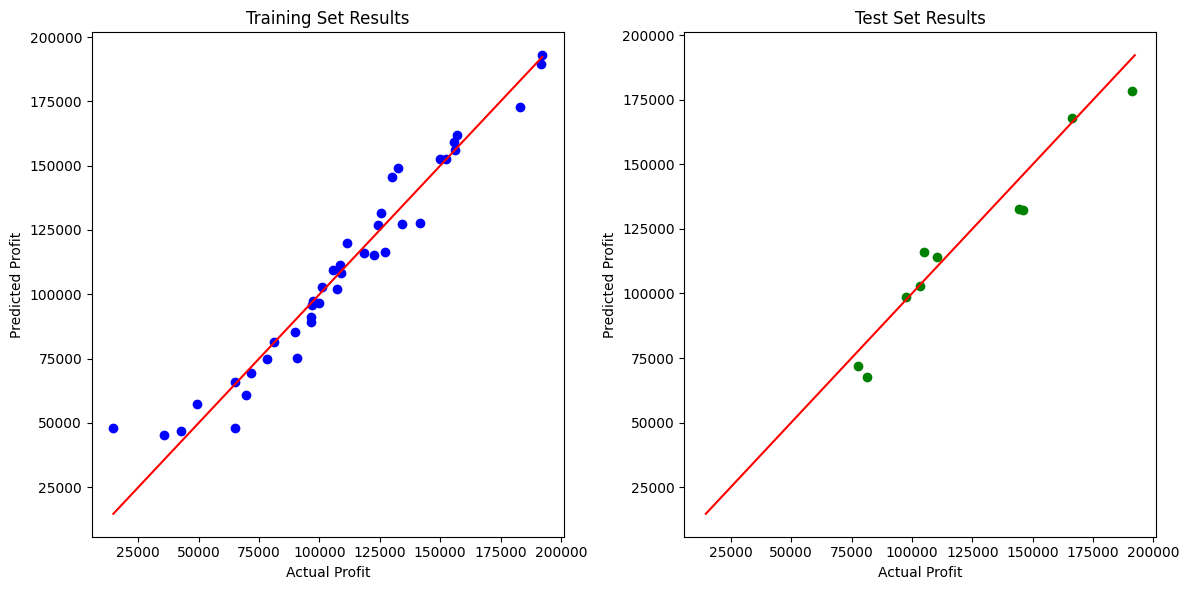

In [32]:

# Plotting
plt.figure(figsize=(12, 6))

# Training set results
plt.subplot(1, 2, 1)
plt.scatter(Y_Train, regressor.predict(X_Train), color='blue')
plt.title('Training Set Results')
plt.xlabel('Actual Profit')
plt.ylabel('Predicted Profit')
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], color='red')  # Diagonal line

# Test set results
plt.subplot(1, 2, 2)
plt.scatter(Y_Test, Y_Pred, color='green')
plt.title('Test Set Results')
plt.xlabel('Actual Profit')
plt.ylabel('Predicted Profit')
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], color='red')    # Diagonal line

plt.tight_layout()
plt.show()

Mean Squared Error: 0.3827998869053227


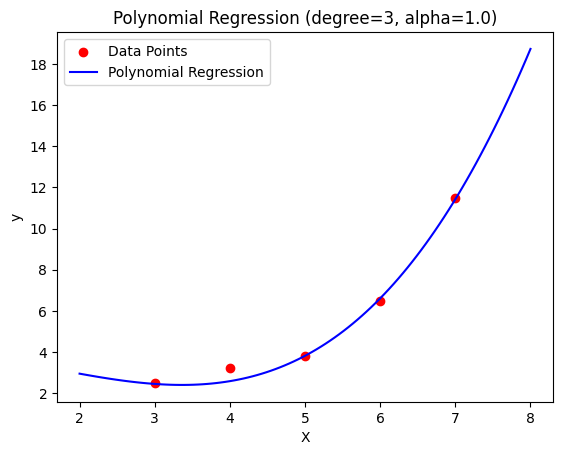

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Input data
X = np.array([3, 4, 5, 6, 7]).reshape(-1, 1)
y = np.array([2.5, 3.2, 3.8, 6.5, 11.5])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to perform polynomial regression with Ridge regularization
def polynomial_regression(X_train, y_train, degree, alpha):
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X_train)

    model = Ridge(alpha=alpha)
    model.fit(X_poly, y_train)

    return model, poly_features

# Try different values of alpha and degrees
alpha = 1.0  # Regularization strength
degree = 3   # Degree of the polynomial

# Fit the model
model, poly_features = polynomial_regression(X_train, y_train, degree, alpha)

# Predict and evaluate
X_poly_test = poly_features.transform(X_test)
y_pred = model.predict(X_poly_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Plotting the results
X_range = np.linspace(2, 8, 100).reshape(-1, 1)
X_poly_range = poly_features.transform(X_range)
y_range_pred = model.predict(X_poly_range)

plt.scatter(X, y, color='red', label='Data Points')
plt.plot(X_range, y_range_pred, label='Polynomial Regression', color='blue')
plt.xlabel('X')
plt.ylabel('y')
plt.title(f'Polynomial Regression (degree={degree}, alpha={alpha})')
plt.legend()
plt.show()


Coefficients: [ 0.         -3.17507529  0.5336826 ]
Intercept: 6.965946124334742
Alpha: 0.1


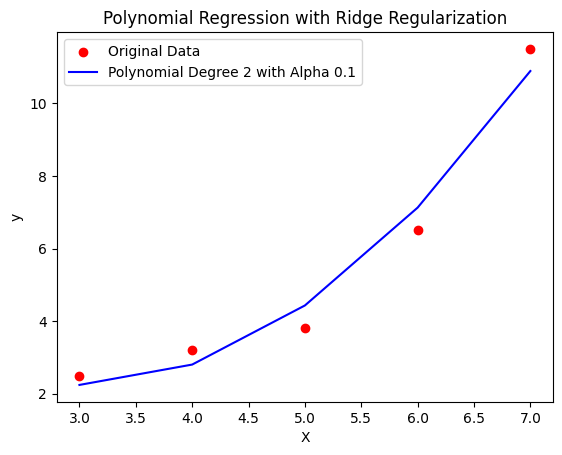

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeaturesfrom sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline

# Input data
X = np.array([3, 4, 5, 6, 7]).reshape(-1, 1)
y = np.array([2.5, 3.2, 3.8, 6.5, 11.5])

# Polynomial degree and regularization parameter alpha
degree = 2
alpha = 0.1

# Create a polynomial regression model with Ridge regularization
model = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=alpha))

# Fit the model
model.fit(X, y)

# Predict values for the given data
y_pred = model.predict(X)

# Display the model's coefficients
print(f"Coefficients: {model.named_steps['ridge'].coef_}")
print(f"Intercept: {model.named_steps['ridge'].intercept_}")
print(f"Alpha: {alpha}")

# Plot the data and the regression line
plt.scatter(X, y, color='red', label='Original Data')
plt.plot(X, y_pred, color='blue', label=f'Polynomial Degree {degree} with Alpha {alpha}')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Polynomial Regression with Ridge Regularization')
plt.show()


Mean Squared Error: 0.7811862675680166
Coefficients: [ 0.         -0.64420601  0.28386266]
Intercept: 1.0567381974248846
Alpha value used: 1.0


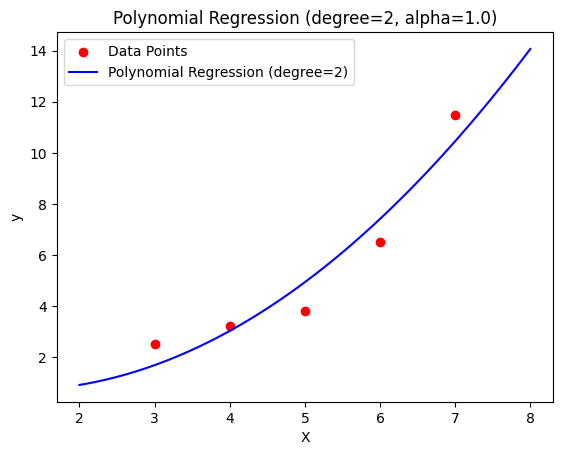

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Input data
X = np.array([3, 4, 5, 6, 7]).reshape(-1, 1)
y = np.array([2.5, 3.2, 3.8, 6.5, 11.5])

# Set degree and alpha value
degree = 2
alpha = 1.0  # Regularization strength

# Function to perform polynomial regression with Ridge regularization
def polynomial_regression(X, y, degree, alpha):
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X)

    model = Ridge(alpha=alpha)
    model.fit(X_poly, y)

    return model, poly_features

# Fit the model
model, poly_features = polynomial_regression(X, y, degree, alpha)

# Predict using the model
y_pred = model.predict(poly_features.transform(X))

# Calculate mean squared error
mse = mean_squared_error(y, y_pred)

# Output results
print(f'Mean Squared Error: {mse}')
print(f'Coefficients: {model.coef_}')
print(f'Intercept: {model.intercept_}')
print(f'Alpha value used: {alpha}')

# Plotting the results
X_range = np.linspace(2, 8, 100).reshape(-1, 1)
X_poly_range = poly_features.transform(X_range)
y_range_pred = model.predict(X_poly_range)

plt.scatter(X, y, color='red', label='Data Points')
plt.plot(X_range, y_range_pred, label='Polynomial Regression (degree=2)', color='blue')
plt.xlabel('X')
plt.ylabel('y')
plt.title(f'Polynomial Regression (degree={degree}, alpha={alpha})')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:2341: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(


Optimal alpha: 0.016297508346206444
Coefficient of x^2: 0.7061492078905758
Coefficient of x: -4.9234680528051555
Constant term: 11.051311650980232


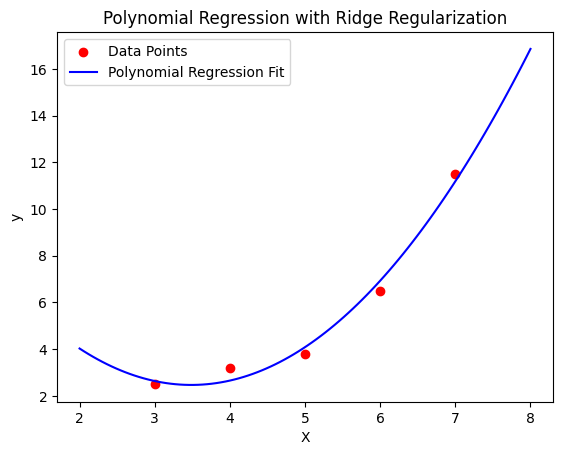

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import RidgeCV

# Input data
X = np.array([3, 4, 5, 6, 7]).reshape(-1, 1)
y = np.array([2.5, 3.2, 3.8, 6.5, 11.5])

# Create polynomial features
degree = 2
poly = PolynomialFeatures(degree)
X_poly = poly.fit_transform(X)

# Ridge regression with cross-validation to find optimal alpha
alphas = np.logspace(-3, 3, 100)
ridge = RidgeCV(alphas=alphas, store_cv_values=True)
ridge.fit(X_poly, y)

# Get the best alpha value
best_alpha = ridge.alpha_
print(f'Optimal alpha: {best_alpha}')

# Coefficients
coefficients = ridge.coef_
intercept = ridge.intercept_

print(f'Coefficient of x^2: {coefficients[2]}')
print(f'Coefficient of x: {coefficients[1]}')
print(f'Constant term: {intercept}')

# Plotting
plt.scatter(X, y, color='red', label='Data Points')
X_fit = np.linspace(2, 8, 100).reshape(-1, 1)
X_fit_poly = poly.transform(X_fit)
y_fit = ridge.predict(X_fit_poly)

plt.plot(X_fit, y_fit, label='Polynomial Regression Fit', color='blue')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Polynomial Regression with Ridge Regularization')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:2341: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(


Optimal alpha: 0.016297508346206444
Coefficient of x^2: 0.7061492078905758
Coefficient of x: -4.9234680528051555
Constant term: 11.051311650980232


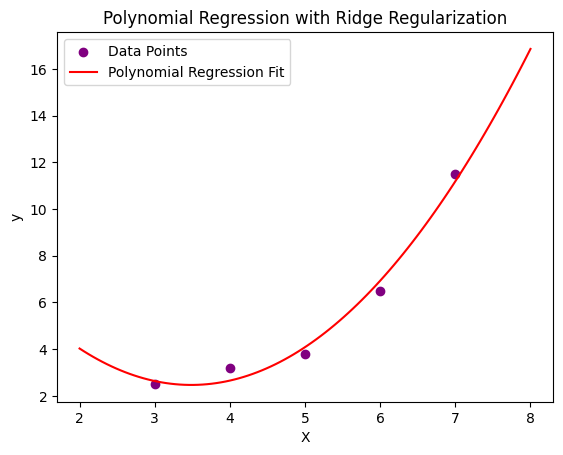

In [48]:
# prompt: import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.linear_model import RidgeCV
# # Input data
# X = np.array([3, 4, 5, 6, 7]).reshape(-1, 1)
# y = np.array([2.5, 3.2, 3.8, 6.5, 11.5])
# # Create polynomial features
# degree = 2
# poly = PolynomialFeatures(degree)
# X_poly = poly.fit_transform(X)
# # Ridge regression with cross-validation to find

# Ridge regression with cross-validation to find optimal alpha
alphas = np.logspace(-3, 3, 100)
ridge = RidgeCV(alphas=alphas, store_cv_values=True)
ridge.fit(X_poly, y)

# Get the best alpha value
best_alpha = ridge.alpha_
print(f'Optimal alpha: {best_alpha}')

# Coefficients
coefficients = ridge.coef_
intercept = ridge.intercept_

print(f'Coefficient of x^2: {coefficients[2]}')
print(f'Coefficient of x: {coefficients[1]}')
print(f'Constant term: {intercept}')

# Plotting
plt.scatter(X, y, color='purple', label='Data Points')
X_fit = np.linspace(2, 8, 100).reshape(-1, 1)
X_fit_poly = poly.transform(X_fit)
y_fit = ridge.predict(X_fit_poly)

plt.plot(X_fit, y_fit, label='Polynomial Regression Fit', color='RED')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Polynomial Regression with Ridge Regularization')
plt.legend()
plt.show()

sns.pairplot(df)
plt.show()
